In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
col_names = ['Age', 'IsMale', 'TotalBilirubin', 'DirectBilirubin', 'AlkphosAlkalinePhosphotase', 'SgptAlamineAminotransferase', 'SgotAspartateAminotransferase', 'TPTotalProtiens', 'ALBAlbumin','AlbuminAndGlobulinRatio', 'Classification']
df = pd.read_csv("Indian_Liver_Patient_Dataset.csv",header=None, names=col_names)

I took this data form https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29 location.

In [3]:
# Checking for missing values.From the output we see there are no missing values
df.isnull().sum()

Age                              0
IsMale                           0
TotalBilirubin                   0
DirectBilirubin                  0
AlkphosAlkalinePhosphotase       0
SgptAlamineAminotransferase      0
SgotAspartateAminotransferase    0
TPTotalProtiens                  0
ALBAlbumin                       0
AlbuminAndGlobulinRatio          4
Classification                   0
dtype: int64

In [4]:
df["AlbuminAndGlobulinRatio"].fillna(0, inplace = True)

In [5]:
df.head()

,Age,IsMale,TotalBilirubin,DirectBilirubin,AlkphosAlkalinePhosphotase,SgptAlamineAminotransferase,SgotAspartateAminotransferase,TPTotalProtiens,ALBAlbumin,AlbuminAndGlobulinRatio,Classification
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            583 non-null    int64  
 1   IsMale                         583 non-null    int64  
 2   TotalBilirubin                 583 non-null    float64
 3   DirectBilirubin                583 non-null    float64
 4   AlkphosAlkalinePhosphotase     583 non-null    int64  
 5   SgptAlamineAminotransferase    583 non-null    int64  
 6   SgotAspartateAminotransferase  583 non-null    int64  
 7   TPTotalProtiens                583 non-null    float64
 8   ALBAlbumin                     583 non-null    float64
 9   AlbuminAndGlobulinRatio        583 non-null    float64
 10  Classification                 583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


<AxesSubplot:xlabel='IsMale', ylabel='count'>

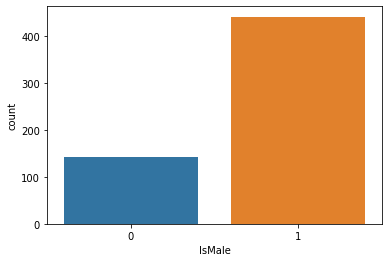

In [7]:
sns.countplot(df['IsMale'],label="count")

In [8]:
# dropping the response variable and biased variables so that X contains only features 
X = df.drop(['IsMale', 'Classification'], axis=1)
X

,Age,TotalBilirubin,DirectBilirubin,AlkphosAlkalinePhosphotase,SgptAlamineAminotransferase,SgotAspartateAminotransferase,TPTotalProtiens,ALBAlbumin,AlbuminAndGlobulinRatio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


In [9]:
# Response variable
y = df['Classification'] 
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Classification, Length: 583, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.88,random_state=42,stratify=y)
print(f"Train Dataset:\n{y_train}")
print(f"Test Dataset:\n{y_test}")

Train Dataset:
466    0
212    0
404    1
333    0
20     1
      ..
507    1
549    1
494    1
344    0
550    1
Name: Classification, Length: 513, dtype: int64
Test Dataset:
329    0
371    0
12     0
171    1
361    0
      ..
406    0
61     1
555    1
396    1
528    1
Name: Classification, Length: 70, dtype: int64


In [11]:
# Create Decision Tree classifer object
classf = DecisionTreeClassifier()

# Train Decision Tree Classifer
classf = classf.fit(X_train,y_train)

#Predict the response for Test Dataset
y_pred = classf.predict(X_test)

Plot Decision tree in normal way

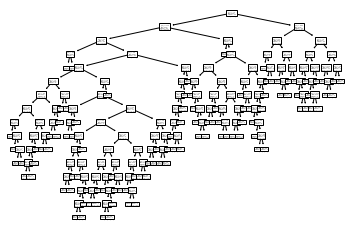

In [12]:
tree.plot_tree(classf);

Plot the tree in Textual format.

In [13]:
text_representation = tree.export_text(classf,
                        feature_names=['Age', 'TotalBilirubin', 'DirectBilirubin', 'AlkphosAlkalinePhosphotase', 'SgptAlamineAminotransferase', 'SgotAspartateAminotransferase', 'TPTotalProtiens', 'ALBAlbumin','AlbuminAndGlobulinRatio'])
print(text_representation)

|--- TotalBilirubin <= 1.65
|   |--- AlkphosAlkalinePhosphotase <= 211.00
|   |   |--- Age <= 20.50
|   |   |   |--- Age <= 15.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  15.00
|   |   |   |   |--- class: 0
|   |   |--- Age >  20.50
|   |   |   |--- ALBAlbumin <= 4.15
|   |   |   |   |--- SgptAlamineAminotransferase <= 19.50
|   |   |   |   |   |--- AlbuminAndGlobulinRatio <= 1.33
|   |   |   |   |   |   |--- SgptAlamineAminotransferase <= 16.50
|   |   |   |   |   |   |   |--- SgptAlamineAminotransferase <= 13.50
|   |   |   |   |   |   |   |   |--- AlkphosAlkalinePhosphotase <= 149.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- AlkphosAlkalinePhosphotase >  149.00
|   |   |   |   |   |   |   |   |   |--- TPTotalProtiens <= 6.95
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- TPTotalProtiens >  6.95
|   |   |   |   |   |   |   |   |   |   |--- TPTotalProtiens <= 7.60
|   |   |   |   

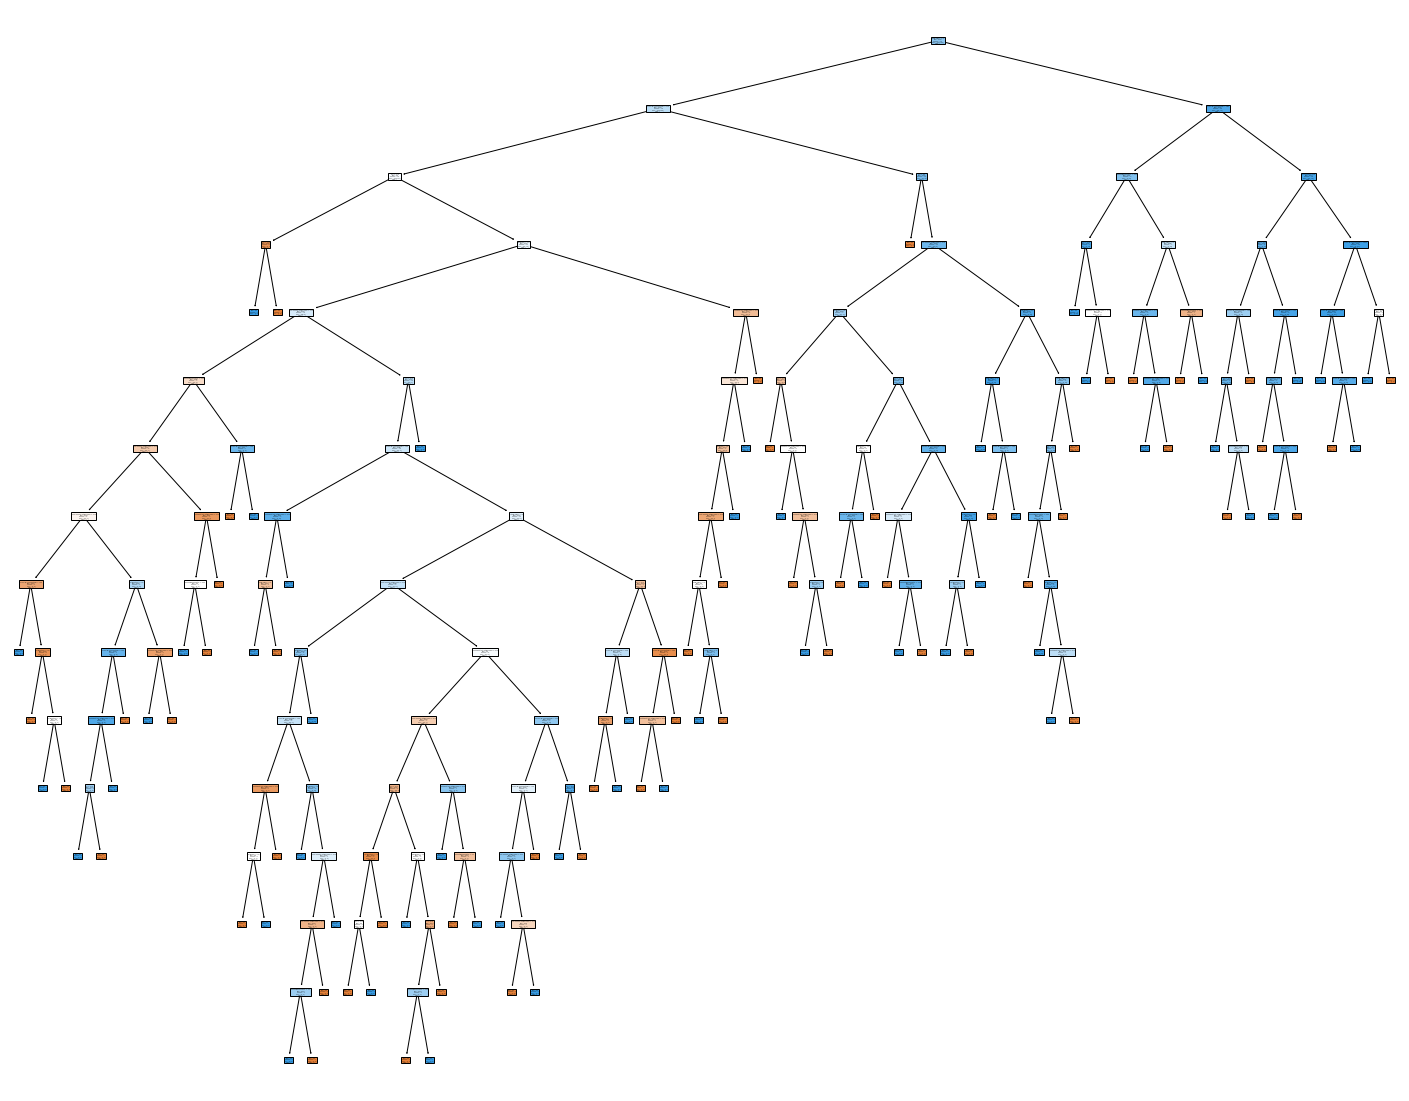

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classf, 
                   feature_names=['Age', 'TotalBilirubin', 'DirectBilirubin', 'AlkphosAlkalinePhosphotase', 'SgptAlamineAminotransferase', 'SgotAspartateAminotransferase', 'TPTotalProtiens', 'ALBAlbumin','AlbuminAndGlobulinRatio'],  
                   class_names='Classification',
                   filled=True)

In [15]:
fig.savefig("DT_Liver_Patient.png")

Checking the confusion matrix

In [16]:
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

[[14  6]
 [10 40]]


In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7714285714285715
Precision: 0.8695652173913043
Recall: 0.8


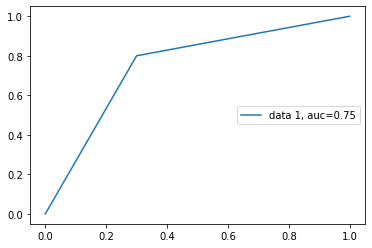

In [18]:
y_pred_proba = classf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=5)
plt.show()

As Decision tree shows higher accuracy rate, so we can use this model for further verification.